In [4]:
import numpy as np
import qiskit as qk
from qiskit_aer import Aer
from scipy.optimize import minimize
from qiskit.visualization import plot_histogram

In [5]:

np.random.seed(974)

n_qubits = 1 #Number of qubits
n_cbits = 1 #Number of classical bits (the number of qubits you want to measure at the end of the circuit)
qreg = qk.QuantumRegister(n_qubits) #Create a quantum register
creg = qk.ClassicalRegister(n_cbits) #Create a classical register
circuit = qk.QuantumCircuit(qreg,creg) #Create your quantum circuit

In [6]:
# Apply various Pauli gates to these basis states

for state_name, initial_state in zip(["|0>", "|1>"], [[1, 0], [0, 1]]):
    for gate in ["x", "y", "z"]:
        circuit.clear()
        circuit.initialize(initial_state, 0)

        exec("circuit." + gate + "(qreg[0])") #Applies a Pauli  gate to the first qubit in the quantum register
        circuit.measure(qreg[0],creg[0])
        backend = Aer.get_backend('qasm_simulator') 
        job = backend.run(circuit,shots=1000) #Run the circuit 1000 times

        result = job.result()
        counts = result.get_counts()
        print(gate.upper() + " gate applied to " + state_name + ":", counts)


X gate applied to |0>: {'1': 1000}
Y gate applied to |0>: {'1': 1000}
Z gate applied to |0>: {'0': 1000}
X gate applied to |1>: {'0': 1000}
Y gate applied to |1>: {'0': 1000}
Z gate applied to |1>: {'1': 1000}


In [7]:
# Apply Hadamard gate to basis states

for state_name, initial_state in zip(["|0>", "|1>"], [[1, 0], [0, 1]]):
    circuit.clear()
    circuit.initialize(initial_state, 0)

    circuit.h(qreg[0])
    circuit.measure(qreg[0],creg[0])
    backend = Aer.get_backend('qasm_simulator') 
    job = backend.run(circuit,shots=1000) #Run the circuit 1000 times

    result = job.result()
    counts = result.get_counts()
    print("Hadamard gate applied to " + state_name + ":", counts)

Hadamard gate applied to |0>: {'1': 485, '0': 515}
Hadamard gate applied to |1>: {'0': 471, '1': 529}


In [8]:
# Apply Phase gate to basis states

for state_name, initial_state in zip(["|0>", "|1>"], [[1, 0], [0, 1]]):
    circuit.clear()
    circuit.initialize(initial_state, 0)

    circuit.p(np.pi, qreg[0])
    circuit.measure(qreg[0],creg[0])
    backend = Aer.get_backend('qasm_simulator') 
    job = backend.run(circuit,shots=1000) #Run the circuit 1000 times

    result = job.result()
    counts = result.get_counts()
    print("Phase gate applied to " + state_name + ":", counts)


Phase gate applied to |0>: {'0': 1000}
Phase gate applied to |1>: {'1': 1000}


In [9]:
# Set up two-qubit basis and initialize into Bell state

n_qubits = 2 #Number of qubits
n_cbits = 2 #Number of classical bits (the number of qubits you want to measure at the end of the circuit)
qreg = qk.QuantumRegister(n_qubits) #Create a quantum register
creg = qk.ClassicalRegister(n_cbits) #Create a classical register
circuit = qk.QuantumCircuit(qreg,creg) #Create your quantum circuit

In [10]:
# Make Bell state ψ+

circuit.h(qreg[0])
circuit.cx(qreg[0], qreg[1])
circuit.x(qreg[1])
circuit.draw()

┌───┐          
q2_0: ┤ H ├──■───────
      └───┘┌─┴─┐┌───┐
q2_1: ─────┤ X ├┤ X ├
           └───┘└───┘
c1: 2/═══════════════

In [11]:
# Apply Hadamard and CNOT gates, as requested in task

circuit.h(qreg)
circuit.cx(qreg[0], qreg[1])
circuit.measure(qreg[0],creg[0])
circuit.measure(qreg[1],creg[1])
circuit.draw()

┌───┐     ┌───┐          ┌─┐   
q2_0: ┤ H ├──■──┤ H ├───────■──┤M├───
      └───┘┌─┴─┐├───┤┌───┐┌─┴─┐└╥┘┌─┐
q2_1: ─────┤ X ├┤ X ├┤ H ├┤ X ├─╫─┤M├
           └───┘└───┘└───┘└───┘ ║ └╥┘
c1: 2/══════════════════════════╩══╩═
                                0  1

{'01': 520, '00': 480}


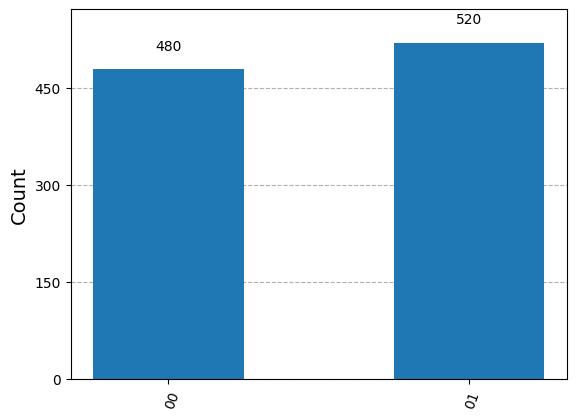

In [12]:
backend = Aer.get_backend('qasm_simulator') 
job = backend.run(circuit,shots=1000) #Run the circuit 1000 times

result = job.result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)